In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
Y=np.load('tomatoes.npy') 
print('Length of data: ' + str(len(Y)))
print('Data:')
print(Y)

Length of data: 30
Data:
[13.27597167 15.08565281 13.41061844 11.5510474  10.63232069 13.76932811
 10.31644803 14.55388057 12.57937117 14.13647951 15.37354413  9.96525246
 12.66541964 11.33164599 12.14113179 11.57753389 15.86128067 10.23999543
 16.36971379 13.96021609 17.27321719 12.23476479 17.96792692 13.92888826
 10.64602864 16.45922776 15.56009798 13.02118014 16.50556431 14.08484862]


In [7]:
def get_minibatch(y,n):
        # x must be an array\n",
    np.random.shuffle(y)
    batch = y[0:n-1]
    y = y
    return batch, y
   


In [15]:
def mSGLD(q,h,force,y,N,batch_size):# n is batch size
    R = np.random.normal(0,1,len(q))
    cov_esti=(N**2/batch_size)*((N-batch_size)/(N-1))*np.cov(Y)
    print('cov:', cov_esti)
    #cov_U=np.mean((0.5*stochastic_force(q,y,N)-np.mean(0.5*stochastic_force(q,y,N)))*(0.5*stochastic_force(q,y,N)-np.mean(0.5*stochastic_force(q,y,N))))
    q = q + (h/2) * stochastic_force(q,y,N) + np.sqrt(h-h**2*cov_esti/4)*R#(np.identity(3)-0.5*h*cov_U)*R
    return q
    

In [9]:
def stochastic_force(q,y,batch_scaling):
    m1,m2,m3 = q
    # constant number in the likelihood part of all derivatives
    denom = np.exp(-((y-m1)**2)/2)+np.exp(-((y-m2)**2)/2)+np.exp(-((y-m3)**2)/2)
    
    dU_dm1 = (13.5-m1)/16 + batch_scaling*sum((y-m1)*np.exp(-((y-m1)**2)/2)/denom)
    dU_dm2 = (13.5-m2)/16 + batch_scaling*sum((y-m2)*np.exp(-((y-m2)**2)/2)/denom)
    dU_dm3 = (13.5-m3)/16 + batch_scaling*sum((y-m3)*np.exp(-((y-m3)**2)/2)/denom)
    
    dU_dq = np.array([dU_dm1,dU_dm2,dU_dm3])
    return dU_dq

In [13]:
def run_simulation_mSGLD( q0, Nsteps, h, step_function, force_function, y, batch_size):
    
    q_traj = [np.copy(q0)] 
    t_traj = [0]

    q = np.copy(q0) 
    t = 0 
    N = len(y)
    batch_scaling = N/batch_size
    
    for n in range(Nsteps):
        y_batch, y = get_minibatch(y,batch_size)
        q = step_function(q, h, force_function,y_batch,batch_scaling,batch_size)
        t = t + h 
        

        q_traj += [q] 
        t_traj += [t] 

    q_traj = np.array(q_traj) 
    t_traj = np.array(t_traj) 

    return q_traj, t_traj

In [11]:
bat=20

In [19]:
#using mSGLD
q0 = np.array([12,12,12])

Nsteps = 100000
h = 0.005

# Run one long trajectory of Nsteps, using the OBABO scheme
q_mtraj, t_mtraj = run_simulation_mSGLD(q0, Nsteps , h, mSGLD, stochastic_force, Y, bat)

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181433
cov: -20.87325985181433
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.8732598518143

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov:

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
c

cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181433
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181433
co

cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: 

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
c

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181431

cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318


cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
co

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: 

cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181

cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
co

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432


cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov

cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814

cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181431

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
co

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432


cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov

cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
c

cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.8732598518143

cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.

cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181433
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov

cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: 

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.8732598518143

cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
c

cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.87325985181432
c

cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318


cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov

cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -

cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.8732598518143

cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181433
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814318
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.87325985181432
cov: -20.873259851814

KeyboardInterrupt: 

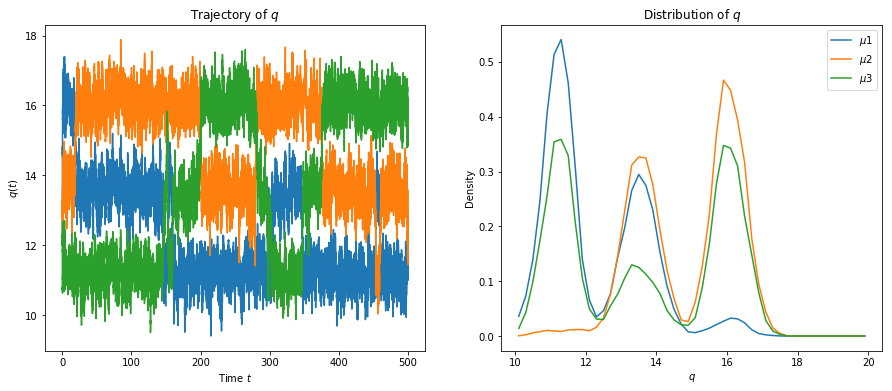

In [17]:
# mSGLD
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot( t_mtraj, q_mtraj )
plt.title('Trajectory of $q$')
plt.ylabel('$q(t)$')
plt.xlabel('Time $t$')

histogram_m1,bins_m1 = np.histogram(q_mtraj[:,0],bins=50,range=[10,20], density=True)
midx_m1 = (bins_m1[0:-1]+bins_m1[1:])/2
plt.subplot(1,2,2)

plt.plot(midx_m1,histogram_m1,label='$\mu 1$')

histogram_m2,bins_m2 = np.histogram(q_mtraj[:,1],bins=50,range=[10,20], density=True)
midx_m2 = (bins_m2[0:-1]+bins_m2[1:])/2
plt.plot(midx_m2,histogram_m2,label='$\mu 2$')

histogram_m3,bins_m3 = np.histogram(q_mtraj[:,2],bins=50,range=[10,20], density=True)
midx_m3 = (bins_m3[0:-1]+bins_m3[1:])/2
plt.plot(midx_m3,histogram_m3,label='$\mu 3$')

plt.title('Distribution of $q$')
plt.xlabel('$q$')
plt.ylabel('Density')
plt.legend()
plt.show()

Mean 1: 11.20372731126157 Standard Deviation: 0.43086151073826073
Mean 2: 13.526705307826449 Standard Deviation: 0.5338324930494489
Mean 3: 16.066274748233674 Standard Deviation: 0.45891173478808717


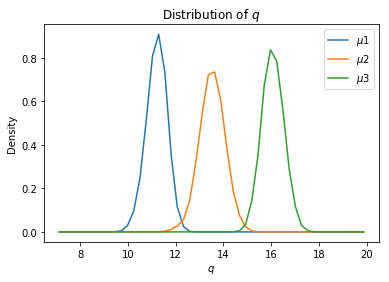

In [18]:
#mSGLD
new_q_mtraj=np.sort(q_mtraj)

histogram_m1,bins_m1 = np.histogram(new_q_mtraj[:,0],bins=50,range=[7,20], density=True)
midx_m1 = (bins_m1[0:-1]+bins_m1[1:])/2
plt.plot(midx_m1,histogram_m1,label='$\mu 1$')

histogram_m2,bins_m2 = np.histogram(new_q_mtraj[:,1],bins=50,range=[7,20], density=True)
midx_m2 = (bins_m2[0:-1]+bins_m2[1:])/2
plt.plot(midx_m2,histogram_m2,label='$\mu 2$')

histogram_m3,bins_m3 = np.histogram(new_q_mtraj[:,2],bins=50,range=[7,20], density=True)
midx_m3 = (bins_m3[0:-1]+bins_m3[1:])/2
plt.plot(midx_m3,histogram_m3,label='$\mu 3$')

plt.title('Distribution of $q$')
plt.xlabel('$q$')
plt.ylabel('Density')
plt.legend()

print('Mean 1:',np.mean(new_q_mtraj[:,0]), 'Standard Deviation:', np.std(new_q_mtraj[:,0]))
print('Mean 2:',np.mean(new_q_mtraj[:,1]),'Standard Deviation:', np.std(new_q_mtraj[:,1]))
print('Mean 3:',np.mean(new_q_mtraj[:,2]),'Standard Deviation:', np.std(new_q_mtraj[:,2]))